In [1]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt  

In [5]:
df=pd.read_excel('C:\\Users\\MYC\\Downloads\\data.xlsx')
date_parser=lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
#df.set_index("Jour", inplace = True)

In [3]:
df.head()

,Cas testés négatifs,Cas testés positifs,Rétablis,Morts,Cas testés,% Patients,Cumul testes,Cumul Patients
Jour,,,,,,,,
2020-02-07,9,0,0,0,9,0.000000,9.0,0.0
2020-02-15,1,0,0,0,1,0.000000,10.0,0.0
2020-02-26,7,0,0,0,7,0.000000,17.0,0.0
2020-03-02,11,1,0,0,12,0.083333,29.0,1.0
2020-03-03,4,0,0,0,4,0.000000,33.0,1.0


## Cas testés Positifs

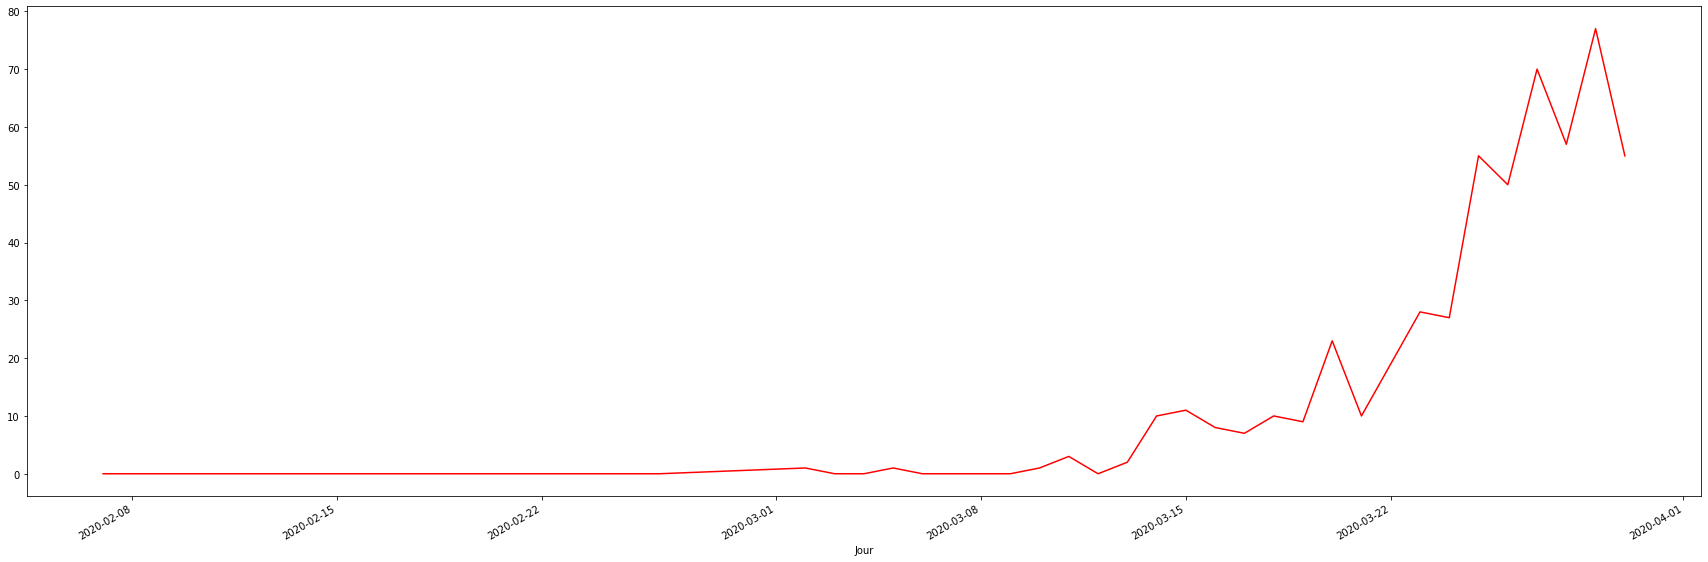

In [4]:
df['Cas testés positifs'].plot(style=['r-'], figsize=(30, 10))

## Prophet Algorithm
What is Prophet?
Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.

### Prédiction des cas testés positifs

In [6]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [7]:
pr_data_test = df.loc[:,['Jour','Cas testés positifs']]
pr_data_test.columns = ['ds','y']
pr_data_test.head()

,ds,y
0,2020-02-07,0
1,2020-02-15,0
2,2020-02-26,0
3,2020-03-02,1
4,2020-03-03,0


In [8]:
m = Prophet()
m.fit(pr_data_test)
future=m.make_future_dataframe(periods=15)
forecast_test=m.predict(future)
forecast_test


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-07,-33.052135,-42.906025,-4.889993,-33.052135,-33.052135,8.394050,8.394050,8.394050,8.394050,8.394050,8.394050,0.0,0.0,0.0,-24.658085
1,2020-02-15,-21.705834,-38.864549,-1.161189,-21.705834,-21.705834,1.394999,1.394999,1.394999,1.394999,1.394999,1.394999,0.0,0.0,0.0,-20.310835
2,2020-02-26,-6.104671,-25.862218,12.957228,-6.104671,-6.104671,-0.125692,-0.125692,-0.125692,-0.125692,-0.125692,-0.125692,0.0,0.0,0.0,-6.230362
3,2020-03-02,0.986767,-20.140339,17.455344,0.986767,0.986767,-2.408656,-2.408656,-2.408656,-2.408656,-2.408656,-2.408656,0.0,0.0,0.0,-1.421888
4,2020-03-03,2.405055,-24.835597,13.363135,2.405055,2.405055,-8.513913,-8.513913,-8.513913,-8.513913,-8.513913,-8.513913,0.0,0.0,0.0,-6.108858
5,2020-03-04,3.823343,-16.278685,22.643532,3.823343,3.823343,-0.125692,-0.125692,-0.125692,-0.125692,-0.125692,-0.125692,0.0,0.0,0.0,3.697651
6,2020-03-05,5.241630,-18.558104,19.301646,5.241630,5.241630,-5.098976,-5.098976,-5.098976,-5.098976,-5.098976,-5.098976,0.0,0.0,0.0,0.142654
7,2020-03-06,6.659918,-4.025646,33.589326,6.659918,6.659918,8.394050,8.394050,8.394050,8.394050,8.394050,8.394050,0.0,0.0,0.0,15.053967
8,2020-03-07,8.078205,-8.835184,29.340017,8.078205,8.078205,1.394999,1.394999,1.394999,1.394999,1.394999,1.394999,0.0,0.0,0.0,9.473204
9,2020-03-09,10.914780,-12.604688,26.138130,10.914780,10.914780,-2.408656,-2.408656,-2.408656,-2.408656,-2.408656,-2.408656,0.0,0.0,0.0,8.506125


In [9]:
test = forecast_test.loc[:,['ds','trend']]
test = test[test['trend']>0]
test.head()
test=test.tail(15)
test.columns = ['Date','Cas positif']
test.head()

,Date,Cas positif
31,2020-03-31,42.117109
32,2020-04-01,43.535397
33,2020-04-02,44.953685
34,2020-04-03,46.371973
35,2020-04-04,47.790260


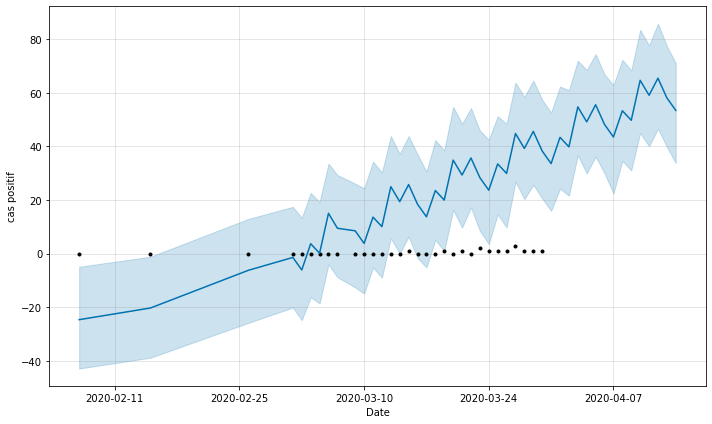

In [19]:
import plotly.offline as py

fig_test = plot_plotly(m, forecast_test)
py.iplot(fig_test) 

fig_test = m.plot(forecast_test,xlabel='Date',ylabel='cas positif')

### Prédiction des morts

In [11]:
pr_data_cm = df.loc[:,['Jour','Morts']]
pr_data_cm.columns = ['ds','y']
pr_data_cm.head()

,ds,y
0,2020-02-07,0
1,2020-02-15,0
2,2020-02-26,0
3,2020-03-02,0
4,2020-03-03,0


In [12]:
m=Prophet()
m.fit(pr_data_cm)
future=m.make_future_dataframe(periods=15)
forecast_cm=m.predict(future)
forecast_cm

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-07,-3.147110,-3.351745,1.834581,-3.147110,-3.147110,2.394208,2.394208,2.394208,2.394208,2.394208,2.394208,0.0,0.0,0.0,-0.752902
1,2020-02-15,-2.224406,-4.928049,0.289806,-2.224406,-2.224406,-0.081961,-0.081961,-0.081961,-0.081961,-0.081961,-0.081961,0.0,0.0,0.0,-2.306367
2,2020-02-26,-0.955781,-3.917672,1.611781,-0.955781,-0.955781,-0.258846,-0.258846,-0.258846,-0.258846,-0.258846,-0.258846,0.0,0.0,0.0,-1.214627
3,2020-03-02,-0.379134,-2.782772,2.284225,-0.379134,-0.379134,0.164339,0.164339,0.164339,0.164339,0.164339,0.164339,0.0,0.0,0.0,-0.214795
4,2020-03-03,-0.263804,-3.444697,1.885762,-0.263804,-0.263804,-0.446927,-0.446927,-0.446927,-0.446927,-0.446927,-0.446927,0.0,0.0,0.0,-0.710731
5,2020-03-04,-0.148474,-2.945121,2.142119,-0.148474,-0.148474,-0.258846,-0.258846,-0.258846,-0.258846,-0.258846,-0.258846,0.0,0.0,0.0,-0.407320
6,2020-03-05,-0.033145,-2.916023,2.504743,-0.033145,-0.033145,-0.177708,-0.177708,-0.177708,-0.177708,-0.177708,-0.177708,0.0,0.0,0.0,-0.210853
7,2020-03-06,0.082185,-0.187412,4.925842,0.082185,0.082185,2.394208,2.394208,2.394208,2.394208,2.394208,2.394208,0.0,0.0,0.0,2.476393
8,2020-03-07,0.197514,-2.518009,2.880294,0.197514,0.197514,-0.081961,-0.081961,-0.081961,-0.081961,-0.081961,-0.081961,0.0,0.0,0.0,0.115553
9,2020-03-09,0.428173,-2.107223,3.164287,0.428173,0.428173,0.164339,0.164339,0.164339,0.164339,0.164339,0.164339,0.0,0.0,0.0,0.592512


In [13]:
cnfrm = forecast_cm.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm=cnfrm.tail(15)
cnfrm.columns = ['Date','death']
cnfrm.head()

,Date,death
31,2020-03-31,2.965423
32,2020-04-01,3.080752
33,2020-04-02,3.196082
34,2020-04-03,3.311411
35,2020-04-04,3.426741


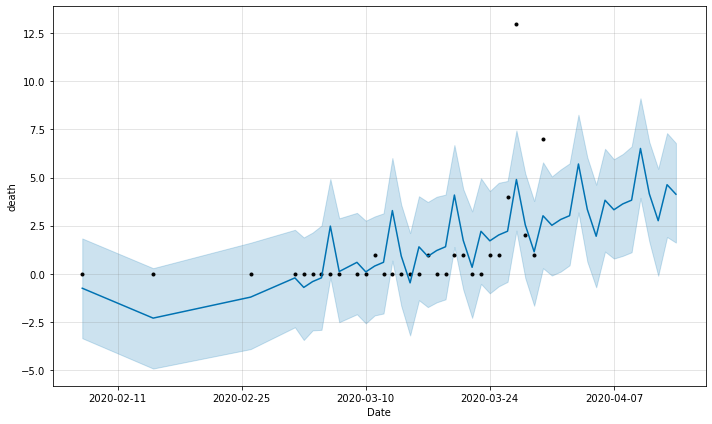

In [14]:
fig_cm = plot_plotly(m, forecast_cm)
py.iplot(fig_cm) 

fig_cm = m.plot(forecast_cm,xlabel='Date',ylabel='death')

### Prédiction des rétablis

In [15]:
pr_data_r = df.loc[:,['Jour','Rétablis']]
pr_data_r.columns = ['ds','y']
pr_data_r.head()

,ds,y
0,2020-02-07,0
1,2020-02-15,0
2,2020-02-26,0
3,2020-03-02,0
4,2020-03-03,0


In [16]:
m=Prophet()
m.fit(pr_data_r)
future=m.make_future_dataframe(periods=15)
forecast_r=m.predict(future)
forecast_r

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-07,-0.855894,-1.226241,0.199764,-0.855894,-0.855894,0.330498,0.330498,0.330498,0.330498,0.330498,0.330498,0.0,0.0,0.0,-0.525396
1,2020-02-15,-0.563576,-1.194463,0.204520,-0.563576,-0.563576,0.042780,0.042780,0.042780,0.042780,0.042780,0.042780,0.0,0.0,0.0,-0.520796
2,2020-02-26,-0.161639,-0.989013,0.377352,-0.161639,-0.161639,-0.149931,-0.149931,-0.149931,-0.149931,-0.149931,-0.149931,0.0,0.0,0.0,-0.311570
3,2020-03-02,0.021059,-0.593438,0.782019,0.021059,0.021059,0.067401,0.067401,0.067401,0.067401,0.067401,0.067401,0.0,0.0,0.0,0.088461
4,2020-03-03,0.057599,-0.847065,0.579871,0.057599,0.057599,-0.191270,-0.191270,-0.191270,-0.191270,-0.191270,-0.191270,0.0,0.0,0.0,-0.133670
5,2020-03-04,0.094139,-0.705177,0.650796,0.094139,0.094139,-0.149931,-0.149931,-0.149931,-0.149931,-0.149931,-0.149931,0.0,0.0,0.0,-0.055792
6,2020-03-05,0.130679,-0.585196,0.776661,0.130679,0.130679,-0.014329,-0.014329,-0.014329,-0.014329,-0.014329,-0.014329,0.0,0.0,0.0,0.116349
7,2020-03-06,0.167218,-0.210255,1.156190,0.167218,0.167218,0.330498,0.330498,0.330498,0.330498,0.330498,0.330498,0.0,0.0,0.0,0.497716
8,2020-03-07,0.203758,-0.422587,0.965371,0.203758,0.203758,0.042780,0.042780,0.042780,0.042780,0.042780,0.042780,0.0,0.0,0.0,0.246538
9,2020-03-09,0.276838,-0.362264,1.026739,0.276838,0.276838,0.067401,0.067401,0.067401,0.067401,0.067401,0.067401,0.0,0.0,0.0,0.344239


In [17]:
rec = forecast_r.loc[:,['ds','trend']]
rec = rec[rec['trend']>0]
rec=rec.tail(15)
rec.columns = ['Date','Recovery']
rec.head()

,Date,Recovery
31,2020-03-31,1.080712
32,2020-04-01,1.117251
33,2020-04-02,1.153791
34,2020-04-03,1.190331
35,2020-04-04,1.226870


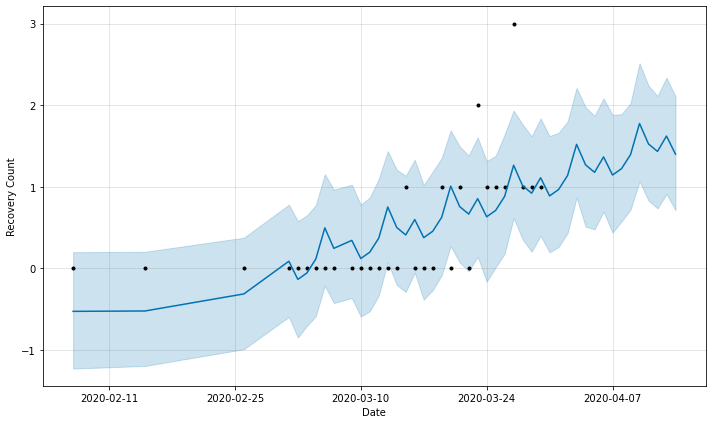

In [18]:
fig_r = plot_plotly(m, forecast_r)
py.iplot(fig_r) 

fig_r = m.plot(forecast_r,xlabel='Date',ylabel='Recovery Count')